In [1]:
### ID: 09893014
### Name: Anisjon Berdiev 

#***************************************************************************************************************************************
# Req: 5 parts 
#part 1: Load the dataset 

from inspect import stack
import pandas as pd 
import pickle
import numpy as np
from sklearn import datasets


#Visuzlaztion 
import seaborn as sns 
sns.set(style='whitegrid')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import scale

# machine learning techniques
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

###
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression

from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import warnings
warnings.filterwarnings('ignore')


#****************************************************************   



In [2]:


# Part One: Load a dataset and Look at the summary of the dataset
df = pd.read_csv("glass_hw.csv")
df.head()

shape = df.shape
print(shape)   #2 shape of df 

columns = df.columns
print(columns)


for i in list(df):
    print(df[i].tolist())     #3 date columns values 

result = df.dtypes            #4data types of each column
print("Data types: ")
print(result)

stats_numeric = df.describe().astype(int)   #5 basic statistics of all numerical columns
print(stats_numeric)
print(df.info())

#**************************************************************** 


(214, 11)
Index(['Id_number', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe',
       'Type_of_glass'],
      dtype='object')
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 19

****************************************************************************************************


Text(0.5, 1.0, 'Glass Types')

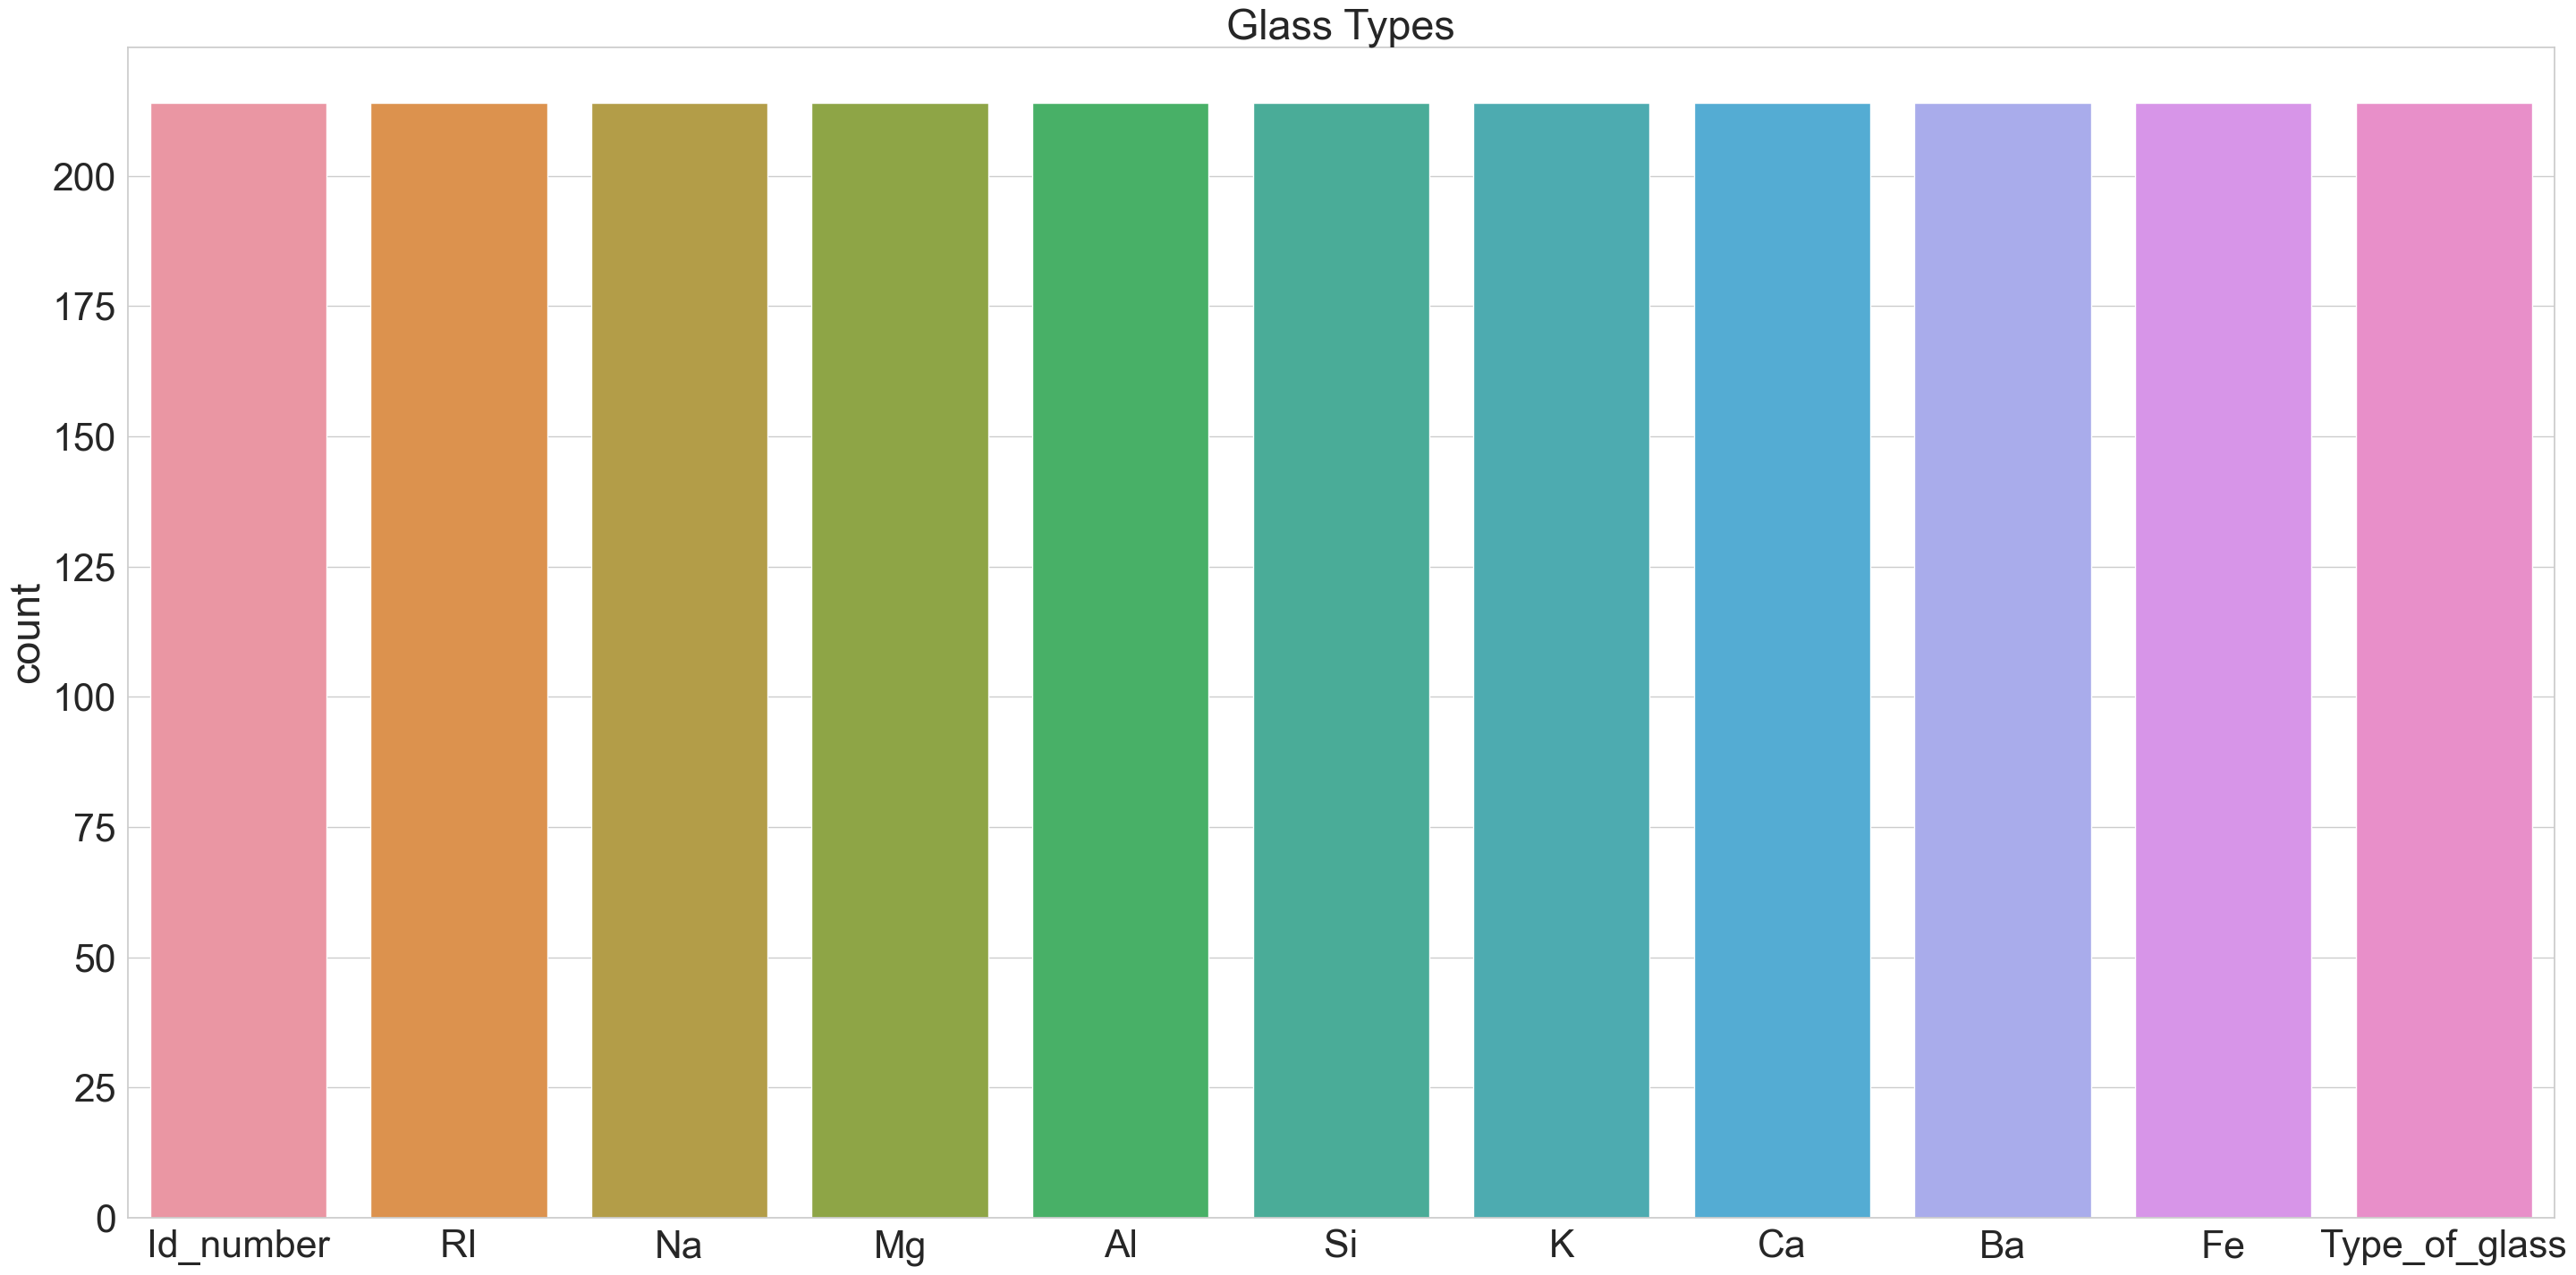

In [3]:
print('*'*100)

#Part Two: EDA (Exploratory Data Analysis) of the dataset
#2.1 - Bars
sns.set(style="whitegrid", font_scale=2.8)
plt.subplots(figsize = (35,17))
sns.countplot(data=df).set_title('Glass Types')             #wrong



array([[<AxesSubplot:title={'center':'Type_of_glass'}>]], dtype=object)

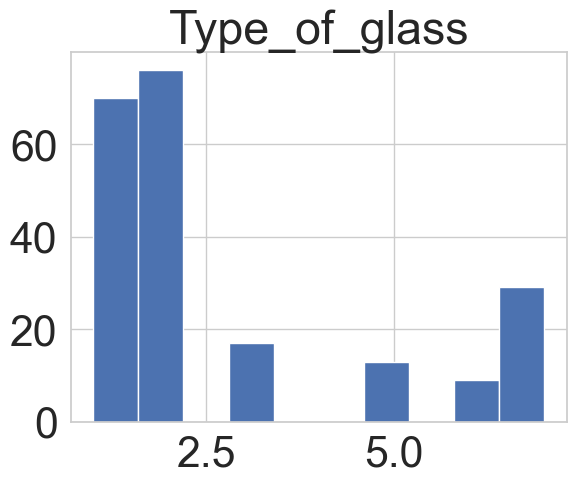

In [4]:
#2.2 - Histogram: distribution of class attributes: Type_of_glass
df.hist(column= 'Type_of_glass')   

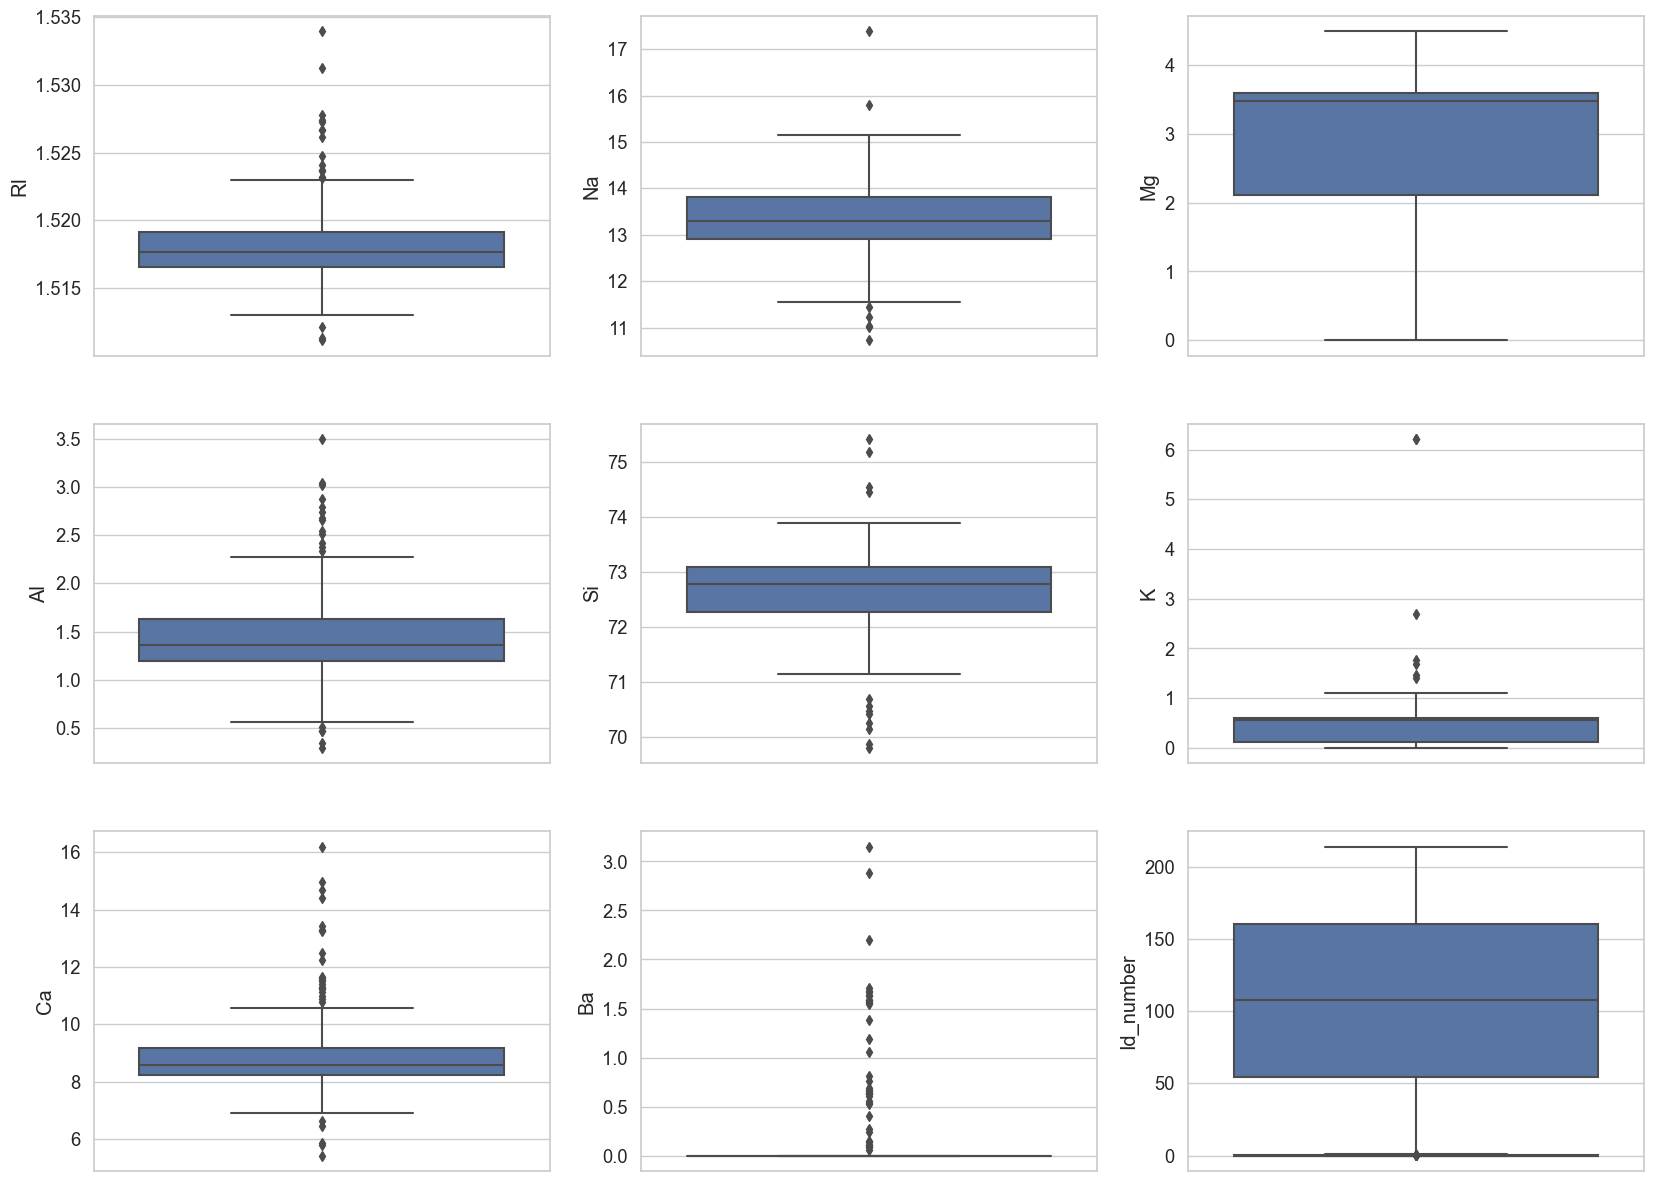

In [5]:

#2.3 - Box Plot: the IQR (interquartile range) of features and class attributes. 
sns.set(style="whitegrid", font_scale=1.2)
plt.subplots(figsize = (20,15))
plt.subplot(3,3,1)
sns.boxplot( y='RI', data=df)
plt.subplot(3,3,2)
sns.boxplot(y='Na', data=df)
plt.subplot(3,3,3)
sns.boxplot(y='Mg', data=df)
plt.subplot(3,3,4)
sns.boxplot(y='Al', data=df)
plt.subplot(3,3,5)
sns.boxplot(y='Si', data=df)
plt.subplot(3,3,6)
sns.boxplot(y='K', data=df)
plt.subplot(3,3,7)
sns.boxplot(y='Ca', data=df)
plt.subplot(3,3,8)
sns.boxplot(y='Ba', data=df)
plt.subplot(3,3,9)
sns.boxplot(y='Fe', data=df)
sns.boxplot(y='Id_number', data=df)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

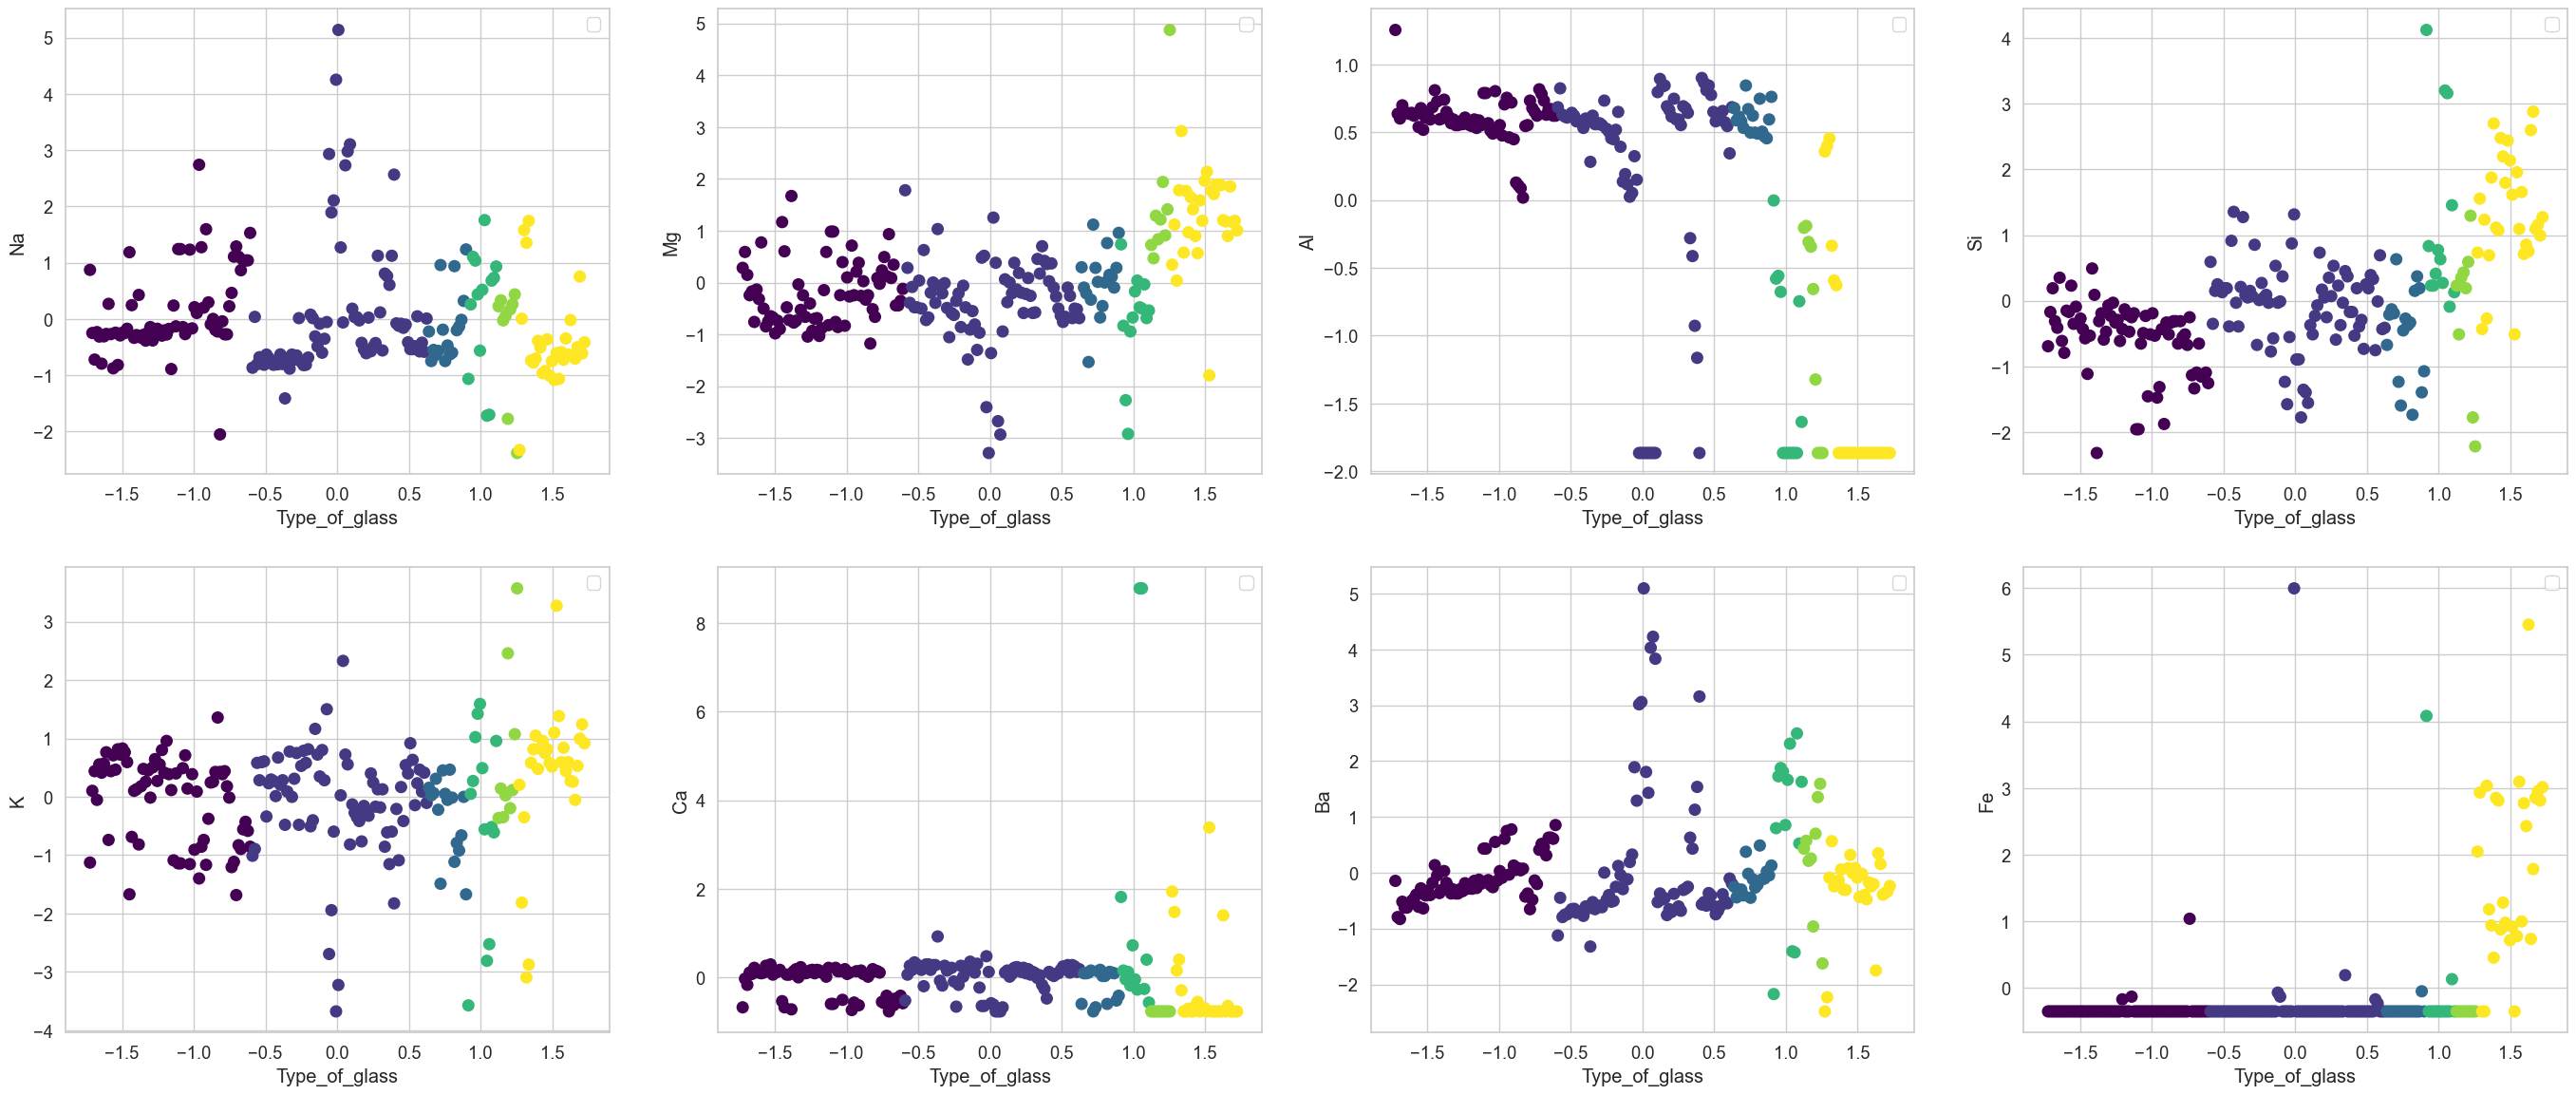

In [6]:
#2.4 - Scatter Plot: show different colors for different types of glass (e.g.Si vs. Type_of_class, Ca vs. Type_of_class, etc)

Y = df["Type_of_glass"].values
del df["Type_of_glass"]
X = df.values
X_scaled = scale(X)
Y = Y.astype(float)

plt.figure(figsize=(34 , 14))

plt.subplot(2 , 4, 1)
plt.scatter(X_scaled[:,0] , X_scaled[:,1] ,s = 70, c = Y, cmap = "viridis"  )
plt.legend(loc = 0)
plt.xlabel("Type_of_glass")
plt.ylabel("Na")

plt.subplot(2 , 4, 2)
plt.scatter(X_scaled[:,0] , X_scaled[:,2] ,s = 70, c = Y, cmap = "viridis"  )
plt.legend(loc = 0)
plt.xlabel("Type_of_glass")
plt.ylabel("Mg")

plt.subplot(2 , 4, 3)
plt.scatter(X_scaled[:,0] , X_scaled[:,3] ,s = 70, c = Y, cmap = "viridis"  )
plt.legend(loc = 0)
plt.xlabel("Type_of_glass")
plt.ylabel("Al")

plt.subplot(2 , 4, 4)
plt.scatter(X_scaled[:,0] , X_scaled[:,4] ,s = 70, c = Y, cmap = "viridis"  )
plt.legend(loc = 0)
plt.xlabel("Type_of_glass")
plt.ylabel("Si")

plt.subplot(2 , 4, 5)
plt.scatter(X_scaled[:,0] , X_scaled[:,5] ,s = 70, c = Y, cmap = "viridis"  )
plt.legend(loc = 0)
plt.xlabel("Type_of_glass")
plt.ylabel("K")

plt.subplot(2 , 4, 6)
plt.scatter(X_scaled[:,0] , X_scaled[:,6] ,s = 70, c = Y, cmap = "viridis"  )
plt.legend(loc = 0)
plt.xlabel("Type_of_glass")
plt.ylabel("Ca")

plt.subplot(2 , 4, 7)
plt.scatter(X_scaled[:,0] , X_scaled[:,7] ,s = 70, c = Y, cmap = "viridis"  )
plt.legend(loc = 0)
plt.xlabel("Type_of_glass")
plt.ylabel("Ba")

plt.subplot(2 , 4, 8)
plt.scatter(X_scaled[:,0] , X_scaled[:,8] ,s = 70, c = Y, cmap = "viridis"  )
plt.legend(loc = 0)
plt.xlabel("Type_of_glass")
plt.ylabel("Fe")

plt.show()


In [7]:
#2.5 - Correlation Matrix: correlations among the features and class
corrM = df.corr()
 
corrM

,Id_number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
Id_number,1.000000,-0.072209,0.375722,-0.650328,0.490113,0.061232,0.003149,0.090800,0.451001,-0.072794
RI,-0.072209,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010
Na,0.375722,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346
Mg,-0.650328,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060
Al,0.490113,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402
Si,0.061232,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201
K,0.003149,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719
Ca,0.090800,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968
Ba,0.451001,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692
Fe,-0.072794,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000


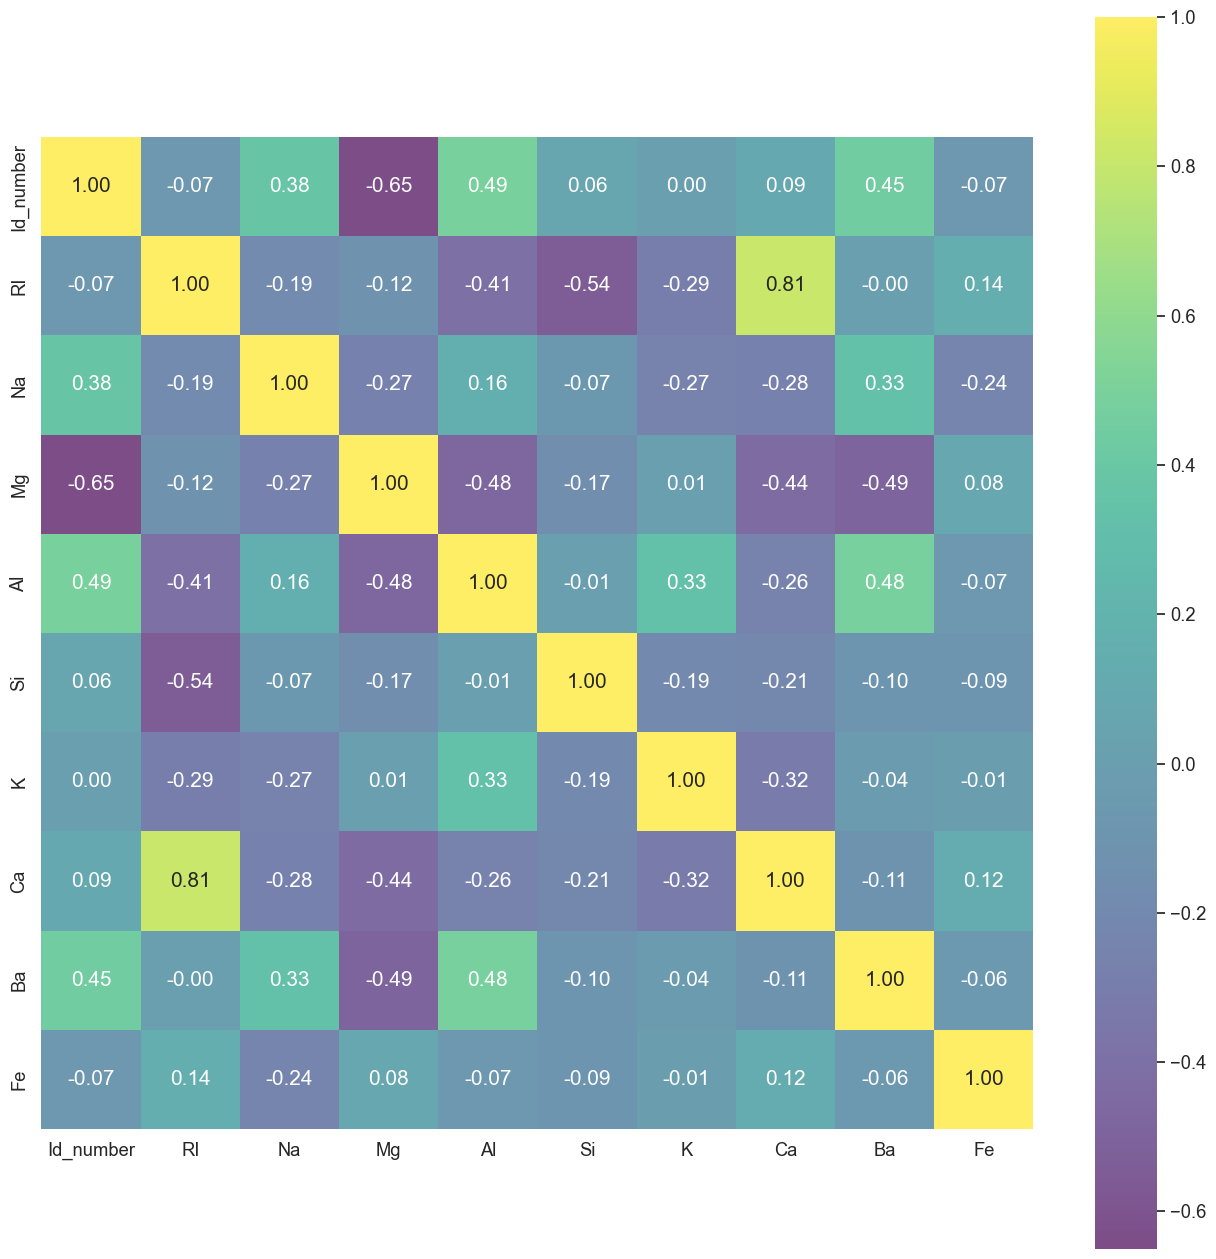

In [8]:
#2.6 - Heat Map: correlations among the features and class attributes
corr = df.corr()
plt.figure(figsize=(16,16))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels=df.columns.values, yticklabels= df.columns.values, alpha = 0.7,   cmap= 'viridis')
plt.show()

In [9]:
# Part Three: Train and Build Machine Learning Models, you should
# split the dataset into train and test dataset, and train at least three multiclassifying machine learning models with three different types of
# machine learning models, such as logistic regression, SVC, KNN,
# Naïve Bayes, Decision Tree Classification, Random Forest
# Classification, etc. AND->>>


# Part Four: Model Evaluation, you should evaluate your trained multiclass classifier model. Thus，please show your model evaluation metrics
# results, such as classification report (precision, recall, F1 score,
# support) AND ->>>

#Part Five: Make Predictions,

X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y,train_size=0.75, test_size=0.25)

model = LinearRegression()
model.fit(X_train, y_train)

result = model.predict(X_test)
print(result)


#1 - Logistic Regression
cl = OneVsRestClassifier(LogisticRegression(C =10 , random_state=1367))
cl.fit(X_train , y_train)
y1 = cl.predict(X_test)
print (classification_report(y_test , y1))
print ("Classification Accuracy = " + str(accuracy_score(y_test , y1)))



[0.6862696  3.26145317 3.12150226 1.0117551  2.41177413 7.41505081
 4.76876973 2.50339691 0.64265563 1.52126319 1.42230861 1.17630563
 3.28061012 6.92375497 5.378381   6.81311628 0.77586657 2.04156889
 7.21341903 2.54675255 2.59984229 2.6724625  2.94846506 1.70882107
 0.382379   6.63541833 2.01314146 1.55602054 2.2122645  4.15899453
 1.56850277 6.86666829 6.95278735 4.21470698 1.31715529 2.0060586
 0.64920897 0.38754561 2.95164776 1.20604674 8.05102344 1.85981456
 4.59669084 2.86058343 5.85884824 2.24745408 5.33398564 2.42093107
 5.8304069  3.23599629 7.1330419  0.95377948 3.1551956  1.73615759]
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        14
         2.0       0.64      0.94      0.76        17
         3.0       0.00      0.00      0.00         5
         5.0       0.50      0.25      0.33         4
         6.0       1.00      0.50      0.67         2
         7.0       0.92      0.92      0.92        12

    accuracy     

In [10]:
#2 - Classification with SVC
clsvc = OneVsRestClassifier(SVC(kernel='rbf',C = 100, gamma = 0.1, probability=True,random_state=1367))
clsvc.fit(X_train , y_train)
y3 = cl.predict(X_test)
print (classification_report(y_test , y3))
print ("Classification Accuracy = " + str(accuracy_score(y_test , y3)))

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        14
         2.0       0.64      0.94      0.76        17
         3.0       0.00      0.00      0.00         5
         5.0       0.50      0.25      0.33         4
         6.0       1.00      0.50      0.67         2
         7.0       0.92      0.92      0.92        12

    accuracy                           0.80        54
   macro avg       0.68      0.60      0.61        54
weighted avg       0.74      0.80      0.75        54

Classification Accuracy = 0.7962962962962963


In [11]:
#3 - Random Forest 
clf = OneVsRestClassifier(RandomForestClassifier(n_estimators=200 ,min_samples_split=2 ,
                                                  min_samples_leaf=5, n_jobs=-1,  random_state=1367))
clf.fit(X_train , y_train)
y4 = clf.predict(X_test)
print (classification_report(y_test , y4))
print ("Classification Accuracy = " + str(accuracy_score(y_test , y4)))

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        14
         2.0       1.00      1.00      1.00        17
         3.0       1.00      1.00      1.00         5
         5.0       1.00      1.00      1.00         4
         6.0       1.00      1.00      1.00         2
         7.0       1.00      1.00      1.00        12

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54

Classification Accuracy = 1.0


In [12]:
# Part Five: Make Predictions, you should save your trained multi-class
# classifier model with joblib or pickle object, and then you can load your
# model and make a prediction with new data

#model is saved at glass_class
filename = 'glass_class'
pickle.dump(model, open(filename, 'wb'))

In [13]:
#making prediction with new model
loaded_model = pickle.load(open(filename, 'rb'))
loaded_model.predict(X_test)

array([0.6862696 , 3.26145317, 3.12150226, 1.0117551 , 2.41177413,
       7.41505081, 4.76876973, 2.50339691, 0.64265563, 1.52126319,
       1.42230861, 1.17630563, 3.28061012, 6.92375497, 5.378381  ,
       6.81311628, 0.77586657, 2.04156889, 7.21341903, 2.54675255,
       2.59984229, 2.6724625 , 2.94846506, 1.70882107, 0.382379  ,
       6.63541833, 2.01314146, 1.55602054, 2.2122645 , 4.15899453,
       1.56850277, 6.86666829, 6.95278735, 4.21470698, 1.31715529,
       2.0060586 , 0.64920897, 0.38754561, 2.95164776, 1.20604674,
       8.05102344, 1.85981456, 4.59669084, 2.86058343, 5.85884824,
       2.24745408, 5.33398564, 2.42093107, 5.8304069 , 3.23599629,
       7.1330419 , 0.95377948, 3.1551956 , 1.73615759])